# AirBnB Madrid

Uno de nuestros clientes opera en el mercado de inmuebles. Está especialmente
interesado en Madrid, donde posee una cantidad importante de viviendas
publicadas en la plataforma AirBnB y nos pide que le asesoremos respondiendo a
la siguiente pregunta:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué puedo hacer para optimizar el precio de mis viviendas?
</div>

El objetivo del proyecto será elaborar un Data Storytelling que de respuesta a
nuestro cliente siguiendo los siguientes pasos:

1. Elaborar un contexto del problema
2. Definir el problema que queremos resolver
3. Definir y desarrollar el roadmap del análisis
4. Recopilar los principales insights para montar el storytelling final:
    - contexto
    - problema
    - insights

# 1. Elaborar un contexto del problema

Antes de poder definir concretamente el problema que vamos a resolver es
importante ganar algo de contexto. Dedica un poco de tiempo a echar un ojo a los
datos con los que contamos y a sacar unas primeras estadísticas y
visualizaciones. 

El dataset contiene muchas variables, piensa en qué está interesado el cliente y
céntrate en la información esencial para darle un contexto de los datos adecuado.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
random.seed(777)

In [2]:
df1 = pd.read_parquet(r'C:\Users\jaume\Desktop\MASTER DATA ANALYTICS\ESTADÍSTICA\projecto_final\airbnb_madrid_conditions.parquet')
df2 = pd.read_parquet(r'C:\Users\jaume\Desktop\MASTER DATA ANALYTICS\ESTADÍSTICA\projecto_final\airbnb_madrid_host.parquet')
df3 = pd.read_parquet(r'C:\Users\jaume\Desktop\MASTER DATA ANALYTICS\ESTADÍSTICA\projecto_final\airbnb_madrid_location.parquet')
df4 = pd.read_parquet(r'C:\Users\jaume\Desktop\MASTER DATA ANALYTICS\ESTADÍSTICA\projecto_final\airbnb_madrid_property.parquet')
df5 = pd.read_parquet(r'C:\Users\jaume\Desktop\MASTER DATA ANALYTICS\ESTADÍSTICA\projecto_final\airbnb_madrid_reviews.parquet')


In [3]:
# Fusionar los DataFrames en uno solo
merged_df = pd.merge(df1, df2, on='id', how='inner')
merged_df = pd.merge(merged_df, df3, on='id', how='inner')
merged_df = pd.merge(merged_df, df4, on='id', how='inner')
merged_df = pd.merge(merged_df, df5, on='id', how='inner')

In [4]:
pd.set_option('display.max_columns', None)


merged_df.head()

,id,price,minimum_nights,maximum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,host_verifications_email,host_verifications_phone,host_verifications_reviews,host_verifications_facebook,host_verifications_government_id,calculated_host_listings_count,host_seniority,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities_wifi_internet,amenities_tv,amenities_air_conditioning,amenities_heating,amenities_kitchen,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros
0,0,70.0,1,365,flexible,0,0,within_an_hour,100.0,1,1,0,1,1,1,0,1,1,3921,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062,apartment,private_room,2,1.0,1.0,0.0,real_bed,1,0,1,1,1,73,14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0
1,1,17.0,4,40,strict_14_with_grace_period,0,0,None,NaN,0,1,1,1,1,1,0,1,2,3610,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818,apartment,private_room,1,1.0,1.0,1.0,real_bed,1,1,1,1,1,33,0,92.0,9.0,9.0,10.0,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0
2,2,50.0,15,730,moderate,0,0,within_an_hour,100.0,0,1,0,1,1,1,0,1,6,3614,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212,apartment,entire_home_apt,6,2.0,3.0,5.0,real_bed,1,1,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
3,3,80.0,5,730,moderate,0,0,within_a_few_hours,100.0,0,1,1,1,1,1,1,1,1,3572,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964,apartment,entire_home_apt,3,1.0,0.0,1.0,real_bed,1,1,1,1,1,9,7,98.0,9.0,10.0,10.0,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0
4,4,115.0,3,10,moderate,0,0,within_an_hour,100.0,1,1,0,1,1,1,1,0,1,3572,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384,apartment,entire_home_apt,4,1.5,2.0,3.0,real_bed,1,1,1,1,1,67,15,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0


In [5]:
#Análisis descriptivo de las variables que creemos más importantes:

# Calculamos las medias de varias variables a la vez
medias = merged_df[['host_seniority', 'dist_km_sol', 'dist_km_airport', 'bedrooms', 'price', 'number_of_reviews', 'review_scores_rating']].mean().round(2)

medias



host_seniority          1323.18
dist_km_sol                3.92
dist_km_airport           13.72
bedrooms                   1.35
price                    131.33
number_of_reviews         38.13
review_scores_rating      92.20
dtype: float64

In [6]:
#Calculamos mediana de las mismas variables anteriores:
medianas = merged_df[['host_seniority', 'dist_km_sol', 'dist_km_airport', 'bedrooms', 'price', 'number_of_reviews', 'review_scores_rating']].median().round(2)
medianas

host_seniority          1279.00
dist_km_sol                2.82
dist_km_airport           14.00
bedrooms                   1.00
price                     65.00
number_of_reviews         10.00
review_scores_rating      95.00
dtype: float64

Comparando las medias y medianas proporcionadas, podemos extraer algunas observaciones interesantes:

1.	Host Seniority (Antigüedad del anfitrión):

•	La media de la antigüedad del anfitrión es de 1323 días, mientras que la mediana es ligeramente menor, con 1279 días.
•	Esto sugiere que puede haber algunos anfitriones con una antigüedad muy alta que están aumentando la media, mientras que la mayoría de los anfitriones tienen una antigüedad más cercana a la mediana.

2.	Distancia a Sol:

•	Tanto la media como la mediana de la distancia a Sol son 4 km.
•	Esto indica que la mayoría de las viviendas están ubicadas a una distancia relativamente similar del centro de la ciudad (Sol).

3.	Distancia al Aeropuerto:

•	Tanto la media como la mediana de la distancia al aeropuerto son 14 km.
•	Esto sugiere que la mayoría de las viviendas están ubicadas a una distancia similar del aeropuerto.

4.	Precio (Price):

•	La media del precio es significativamente mayor que la mediana: 131 frente a 65.
•	Esto sugiere que puede haber algunas viviendas con precios muy altos que están aumentando la media, mientras que la mayoría de las viviendas tienen precios más cercanos a la mediana.

5.	Número de Reseñas (Number of Reviews):

•	La media del número de reseñas es 38, mientras que la mediana es 10.
•	Esto sugiere que hay algunas viviendas que han recibido un gran número de reseñas, lo que aumenta la media, mientras que la mayoría de las viviendas tienen un número de reseñas más cercano a la mediana.


In [7]:
#Calculamos la moda de las variables categóricas más importantes
modas = merged_df[['neighbourhood', 'property_type', 'amenities_kitchen', 'amenities_wifi_internet', 'amenities_air_conditioning', 'cancellation_policy']].mode()
modas

,neighbourhood,property_type,amenities_kitchen,amenities_wifi_internet,amenities_air_conditioning,cancellation_policy
0,Centro,apartment,1,1,1,strict_14_with_grace_period


Moda
1.	Barrio (Neighbourhood): La moda indica que la mayoría de las propiedades se encuentran en el barrio Centro. Esto sugiere que Centro es un área popular para alojamiento en Airbnb en el conjunto de datos analizado.

2.	Tipo de Propiedad (Property Type): La moda indica que la mayoría de las propiedades son apartamentos. Esto sugiere que los apartamentos son el tipo de propiedad más común entre las propiedades listadas en Airbnb en el conjunto de datos.

3.	Comodidades de Cocina (Amenities Kitchen): La moda indica que la mayoría de las propiedades tienen cocina. Esto sugiere que la presencia de una cocina es una característica común entre las propiedades listadas en Airbnb en el conjunto de datos.

4.	Comodidades de Wifi (Amenities Wifi Internet): La moda indica que la mayoría de las propiedades tienen wifi/internet. Esto sugiere que la presencia de wifi o acceso a internet es una comodidad comúnmente ofrecida en las propiedades listadas en Airbnb en el conjunto de datos.

5.	Comodidades de Aire Acondicionado (Amenities Air Conditioning): La moda indica que la mayoría de las propiedades tienen aire acondicionado. Esto sugiere que la presencia de aire acondicionado es una comodidad comúnmente ofrecida en las propiedades listadas en Airbnb en el conjunto de datos.

6.	Política de Cancelación (Cancellation Policy): La moda indica que la mayoría de las propiedades tienen una política de cancelación "strict_14_with_grace_period". Esto sugiere que esta política es la más comúnmente utilizada entre las propiedades listadas en Airbnb en el conjunto de datos.


In [8]:
#Calculamos la desviación estandar 
desviacion_estandar = merged_df[['host_seniority', 'dist_km_sol', 'dist_km_airport', 'bedrooms', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_communication', 'review_scores_location']].std().round(2)
desviacion_estandar

host_seniority                 813.12
dist_km_sol                      2.82
dist_km_airport                  2.67
bedrooms                         0.86
price                          364.80
number_of_reviews               65.80
review_scores_rating             9.33
review_scores_communication      0.83
review_scores_location           0.72
dtype: float64

Desviación estándar

1.	Host Seniority (Antigüedad del anfitrión): Con una desviación estándar de aproximadamente 813 días, hay una cantidad considerable de variabilidad en la antigüedad de los anfitriones. Esto sugiere que algunos anfitriones pueden tener una antigüedad significativamente mayor o menor en comparación con la media.

2.	Distancia a Sol: Con una desviación estándar de aproximadamente 2.82 km, la distancia de las propiedades a la plaza del Sol varía moderadamente en el conjunto de datos. Esto indica que algunas propiedades pueden estar significativamente más cerca o más lejos del centro de la ciudad que la media.

3.	Distancia al Aeropuerto: Con una desviación estándar de aproximadamente 2.67 km, la distancia de las propiedades al aeropuerto también varía moderadamente en el conjunto de datos. Esto sugiere que algunas propiedades pueden estar más cerca o más lejos del aeropuerto en comparación con la media.

4.	Precio: Con una desviación estándar de aproximadamente 364.80, el precio de las propiedades varía considerablemente en el conjunto de datos. Esto indica que algunas propiedades pueden tener precios significativamente más altos o más bajos que la media.

5.	Número de Reseñas (Number of Reviews): Con una desviación estándar de aproximadamente 65.80, la cantidad de reseñas recibidas por las propiedades también varía considerablemente. Esto sugiere que algunas propiedades pueden recibir muchas más o muchas menos reseñas que la media.

6.	Puntuación de las Reseñas (Review Scores Rating): Con una desviación estándar de aproximadamente 9.33, las puntuaciones de las reseñas también varían considerablemente en el conjunto de datos. Esto indica que algunas propiedades pueden recibir puntuaciones de reseñas significativamente más altas o más bajas que la media.

7.	Puntuación de la Comunicación con el Anfitrión (Review Scores Communication): Con una desviación estándar de aproximadamente 0.83, las puntuaciones de comunicación con el anfitrión también varían moderadamente. Esto sugiere que algunas propiedades pueden tener puntuaciones de comunicación con el anfitrión más altas o más bajas que la media.

8.	Puntuación de la Localización (Review Scores Location): Con una desviación estándar de aproximadamente 0.72, las puntuaciones de localización también varían moderadamente. Esto sugiere que algunas propiedades pueden tener puntuaciones de localización más altas o más bajas que la media.


In [9]:
#Calculamos quartiles de algunas de ellas:
primer_cuartil = merged_df[['host_seniority', 'dist_km_sol', 'dist_km_airport', 'price', 'review_scores_rating']].quantile(0.25)

tercer_cuartil = merged_df[['host_seniority', 'dist_km_sol', 'dist_km_airport', 'price', 'review_scores_rating']].quantile(0.75)

primer_cuartil , tercer_cuartil


(host_seniority          624.000000
 dist_km_sol               1.930370
 dist_km_airport          13.081924
 price                    40.000000
 review_scores_rating     90.000000
 Name: 0.25, dtype: float64,
 host_seniority          1880.000000
 dist_km_sol                5.292589
 dist_km_airport           14.845695
 price                    102.000000
 review_scores_rating      98.000000
 Name: 0.75, dtype: float64)

Quartiles
1.	Antigüedad del anfitrión (Host Seniority): El primer cuartil (Q1) es 624 días y el tercer cuartil (Q3) es 1880 días. Esto indica que el 25% de los anfitriones tienen una antigüedad de 624 días o menos, mientras que el 75% de los anfitriones tienen una antigüedad de 1880 días o menos.

2.	Distancia al Sol (Dist_km_sol): El primer cuartil (Q1) es aproximadamente 1.93 km y el tercer cuartil (Q3) es aproximadamente 5.29 km. Esto indica que el 25% de las propiedades están a 1.93 km del Sol o menos, mientras que el 75% de las propiedades están a 5.29 km del Sol o menos.

3.	Distancia al Aeropuerto (Dist_km_airport): El primer cuartil (Q1) es aproximadamente 13.08 km y el tercer cuartil (Q3) es aproximadamente 14.85 km. Esto indica que el 25% de las propiedades están a 13.08 km del aeropuerto o menos, mientras que el 75% de las propiedades están a 14.85 km del aeropuerto o menos.

4.	Número de Dormitorios (Bedrooms): El primer cuartil (Q1) es 1 y el tercer cuartil (Q3) es 1. Esto indica que el 25% de las propiedades tienen 1 dormitorio o menos, mientras que el 75% de las propiedades tienen 1 dormitorio o menos.

5.	Precio (Price): El primer cuartil (Q1) es 40 y el tercer cuartil (Q3) es 102. Esto indica que el 25% de las propiedades tienen un precio de 40 o menos, mientras que el 75% de las propiedades tienen un precio de 102 o menos.

6.	Puntuación de las Reseñas (Review Scores Rating): El primer cuartil (Q1) es 90 y el tercer cuartil (Q3) es 98. Esto indica que el 25% de las propiedades tienen una puntuación de reseñas de 90 o menos, mientras que el 75% de las propiedades tienen una puntuación de reseñas de 98 o menos.


In [10]:
#Calculamos el rango intercuartílico
RIQ = tercer_cuartil - primer_cuartil
RIQ

host_seniority          1256.000000
dist_km_sol                3.362219
dist_km_airport            1.763771
price                     62.000000
review_scores_rating       8.000000
dtype: float64

RIQ

1.	host_seniority (antigüedad del anfitrión):

•	El IQR para la antigüedad del anfitrión es 1256 días.
•	Esto significa que el 50% de los anfitriones tienen una antigüedad entre 0 y 1256 días.
•	Puede ser útil para comprender la distribución de la antigüedad de los anfitriones y su variabilidad.

2.	dist_km_sol (distancia a Sol):

•	El IQR para la distancia a Sol es de aproximadamente 3.36 kilómetros.
•	Esto indica que el 50% de las propiedades están ubicadas a una distancia entre 0 y 3.36 kilómetros de la Plaza del Sol.
•	Puede ser útil para entender la distribución de la ubicación de las propiedades en relación con el centro de la ciudad.

3.	dist_km_airport (distancia al aeropuerto):

•	El IQR para la distancia al aeropuerto es de aproximadamente 1.76 kilómetros.
•	Esto significa que el 50% de las propiedades están ubicadas a una distancia entre 0 y 1.76 kilómetros del aeropuerto.
•	Puede ser útil para comprender la distribución de la ubicación de las propiedades en relación con el aeropuerto.

4.	price (precio):

•	El IQR para el precio es de 62 unidades (moneda no especificada).
•	Esto indica que el 50% de los precios de alquiler están entre 0 y 62 unidades.
•	Puede ser útil para entender la distribución de los precios de alquiler y su variabilidad.

5.	review_scores_rating (puntuación de las críticas):

•	El IQR para la puntuación de las críticas es de aproximadamente 8.
•	Esto significa que el 50% de las críticas tienen una puntuación entre 0 y 8.
•	Puede ser útil para comprender la distribución de las puntuaciones de las críticas y su variabilidad.


In [11]:
#Calculamos los rangos max, min
maximos = merged_df[['host_seniority', 'dist_km_sol', 'dist_km_airport', 'price', 'review_scores_rating', 'bedrooms', 'review_scores_rating']].max().round(2)
minimos = merged_df[['host_seniority', 'dist_km_sol', 'dist_km_airport', 'price', 'review_scores_rating', 'bedrooms', 'review_scores_rating']].min().round(2)
maximos, minimos


(host_seniority          4044.00
 dist_km_sol               19.43
 dist_km_airport           25.23
 price                   9999.00
 review_scores_rating     100.00
 bedrooms                  11.00
 review_scores_rating     100.00
 dtype: float64,
 host_seniority          -1.00
 dist_km_sol              0.00
 dist_km_airport          0.72
 price                    1.00
 review_scores_rating    20.00
 bedrooms                 0.00
 review_scores_rating    20.00
 dtype: float64)

Rangos max min

1.	host_seniority (antigüedad del anfitrión):

•	El valor máximo de 4044 días indica que el anfitrión más antiguo tiene una antigüedad de 4044 días.
•	El valor mínimo de -1 día parece ser un valor atípico o un error, ya que no tiene sentido tener una antigüedad negativa.

2.	dist_km_sol (distancia  Sol):

•	El valor máximo de 19.43 kilómetros indica que la propiedad más lejana del centro de la ciudad está a una distancia de 19.43 kilómetros.
•	El valor mínimo de 0 kilómetros podría indicar propiedades ubicadas en el centro de la ciudad.

3.	dist_km_airport (distancia al aeropuerto):

•	El valor máximo de 25.23 kilómetros indica que la propiedad más lejana del aeropuerto está a una distancia de 25.23 kilómetros.
•	El valor mínimo de 0.72 kilómetros podría indicar propiedades muy cercanas al aeropuerto.

4.	price (precio):

•	El valor máximo de 9999 unidades (moneda no especificada) indica el precio máximo de alquiler observado en los datos.
•	El valor mínimo de 1 unidad parece ser un valor atípico o un error, ya que es inusual encontrar un alquiler por ese precio tan bajo.

5.	review_scores_rating (puntuación de las críticas):

•	El valor máximo de 100 indica la calificación más alta posible, lo cual es positivo.
•	El valor mínimo de 20 podría indicar críticas con puntuaciones muy bajas, lo que podría ser indicativo de problemas o insatisfacción por parte de los huéspedes.

6.	bedrooms (habitaciones):

•	El valor máximo de 11 habitaciones indica la propiedad con el mayor número de habitaciones observado en los datos.
•	El valor mínimo de 0 habitaciones podría ser un valor atípico o un error, ya que es poco común encontrar una propiedad sin habitaciones.


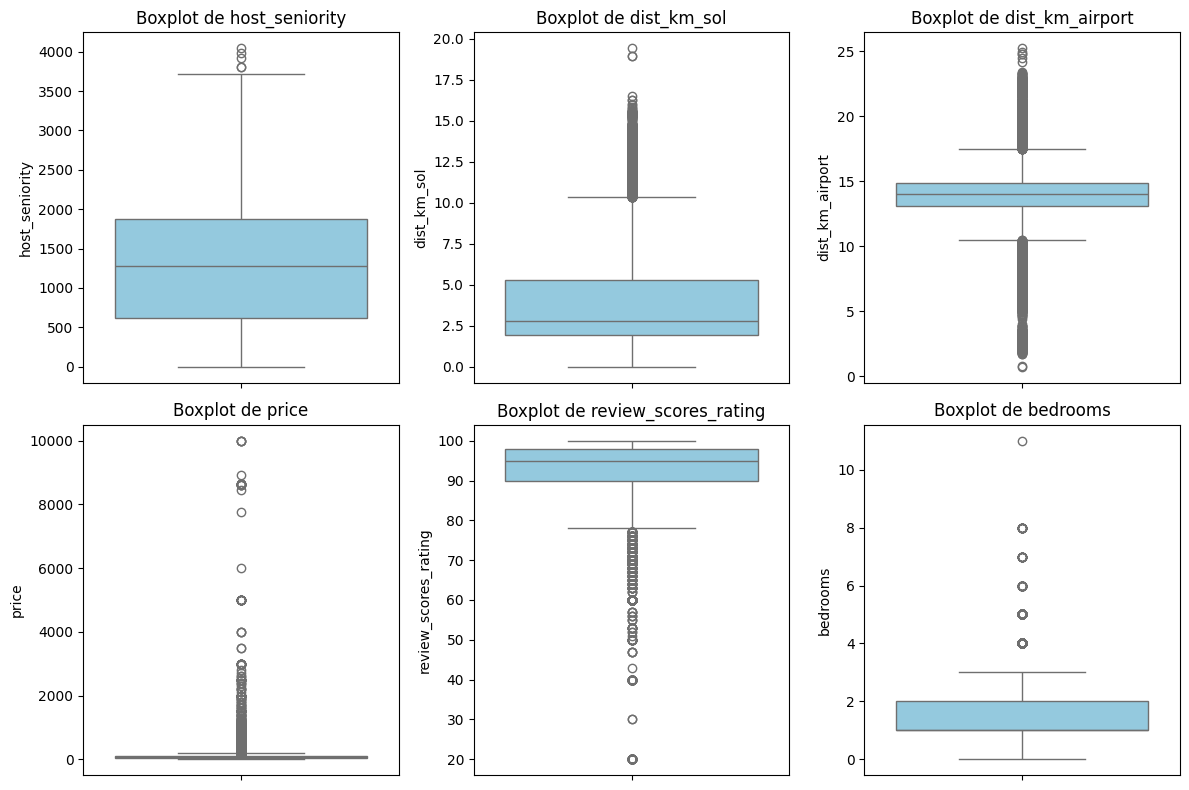

In [12]:
# Crear un solo gráfico con varios boxplots
plt.figure(figsize=(12, 8))

# Variables a incluir en los boxplots
variables = ['host_seniority', 'dist_km_sol', 'dist_km_airport', 'price', 'review_scores_rating', 'bedrooms']

# Crear los boxplots para cada variable
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)  # Seleccionar la posición del subplot
    sns.boxplot(y=merged_df[var], color='skyblue')
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

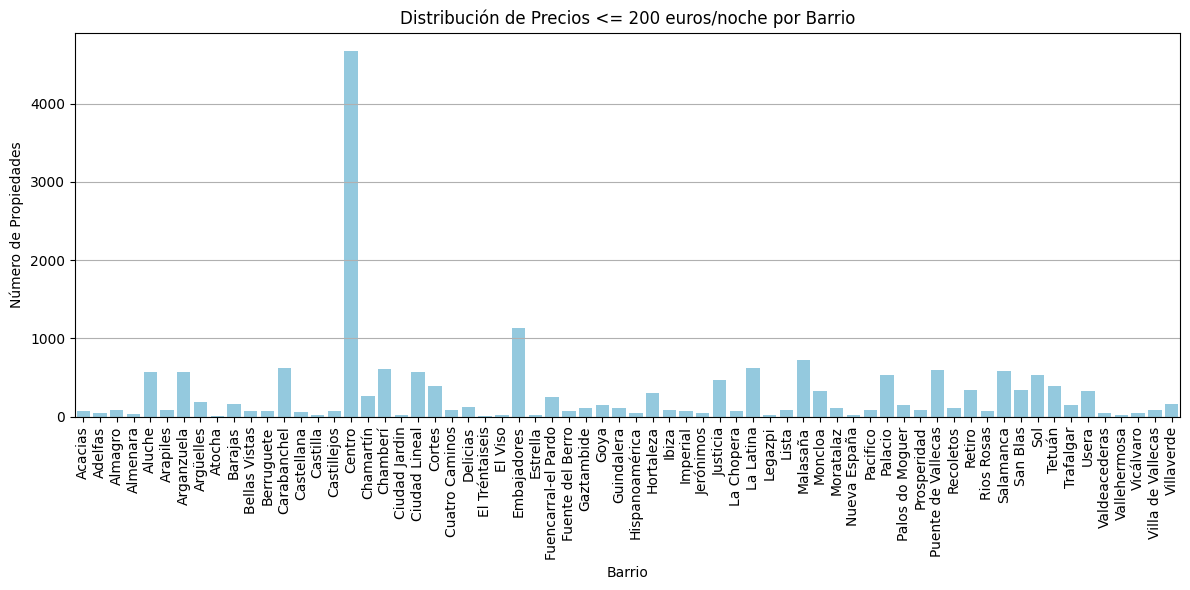

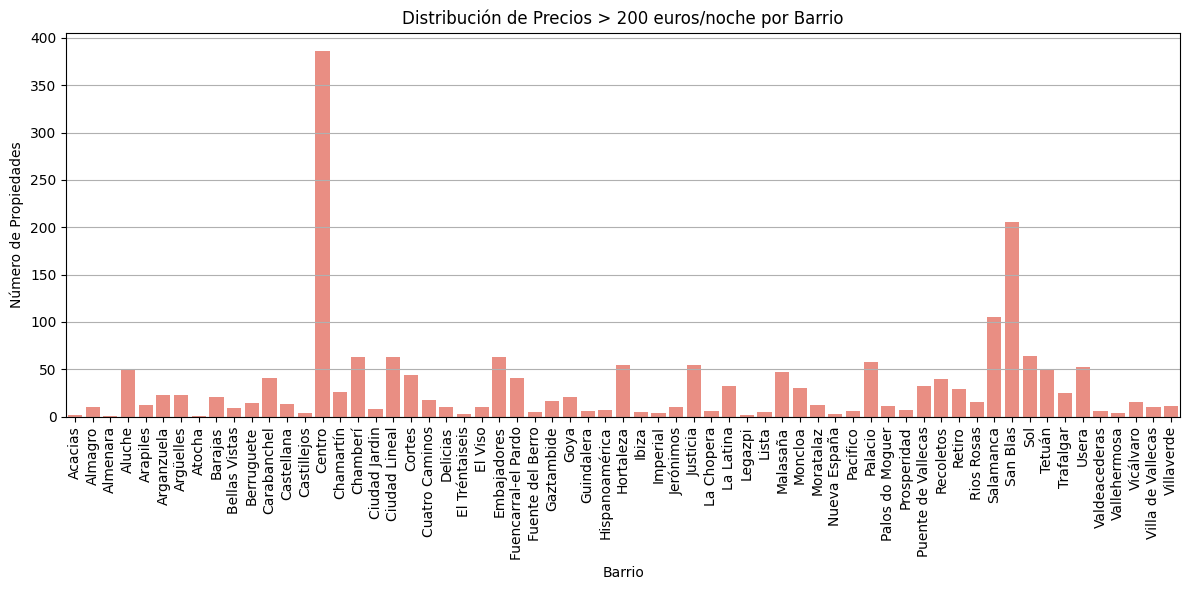

In [13]:
# Separar los datos en dos grupos según el rango de precios
low_price = merged_df[merged_df['price'] <= 200]
high_price = merged_df[merged_df['price'] > 200]

# Contar el número de propiedades en cada barrio para cada grupo de precios
low_price_counts = low_price['neighbourhood'].value_counts().sort_index()
high_price_counts = high_price['neighbourhood'].value_counts().sort_index()

# Crear el gráfico de barras para precios menores o iguales a 200 euros
plt.figure(figsize=(12, 6))
sns.barplot(x=low_price_counts.index, y=low_price_counts.values, color='skyblue')
plt.title('Distribución de Precios <= 200 euros/noche por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Añadir rejilla en el eje y
plt.tight_layout()
plt.show()

# Crear el gráfico de barras para precios mayores a 200 euros
plt.figure(figsize=(12, 6))
sns.barplot(x=high_price_counts.index, y=high_price_counts.values, color='salmon')
plt.title('Distribución de Precios > 200 euros/noche por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Añadir rejilla en el eje y
plt.tight_layout()
plt.show()

C:\Users\jaume\AppData\Local\Temp\ipykernel_24260\2750819717.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_superhost.index, y=proporcion_superhost.values, palette='pastel')


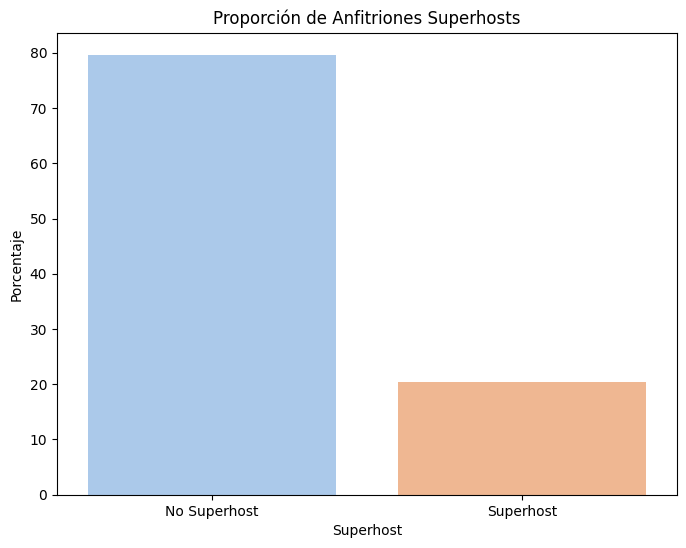

In [14]:


# Calcular la proporción de anfitriones que son superhosts y los que no lo son
proporcion_superhost = merged_df['host_is_superhost'].value_counts(normalize=True) * 100

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=proporcion_superhost.index, y=proporcion_superhost.values, palette='pastel')
plt.title('Proporción de Anfitriones Superhosts')
plt.xlabel('Superhost')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], ['No Superhost', 'Superhost'])
plt.show()

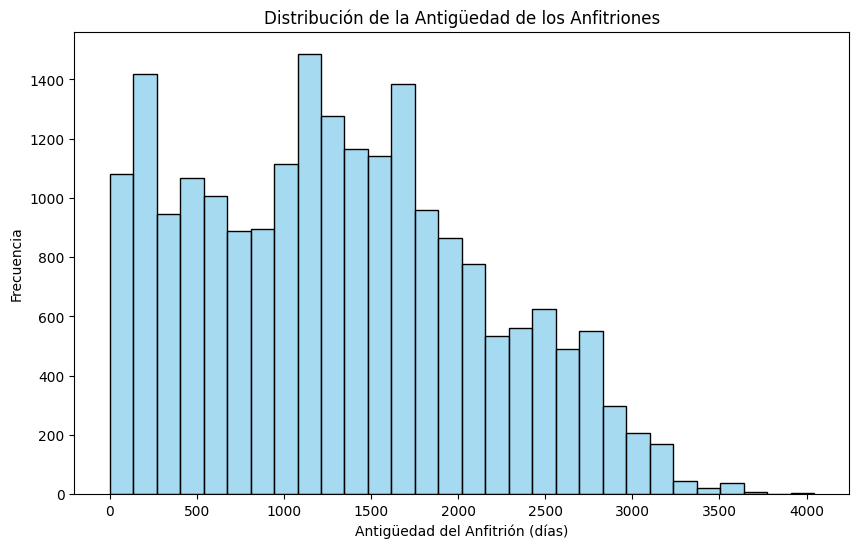

In [15]:
# Histograma de la antigüedad de los anfitriones
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='host_seniority', bins=30, color='skyblue')
plt.title('Distribución de la Antigüedad de los Anfitriones')
plt.xlabel('Antigüedad del Anfitrión (días)')
plt.ylabel('Frecuencia')
plt.show()

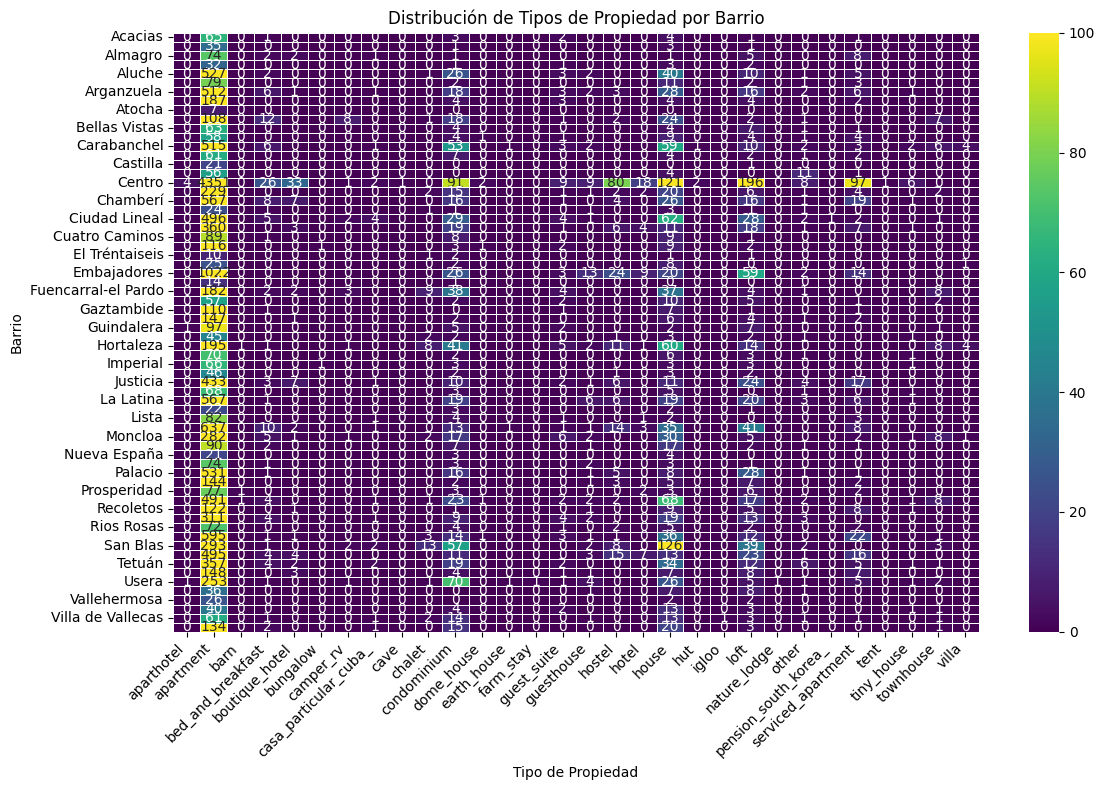

In [16]:
#Distribución tipos de propiedad por barrio

# Calcular el conteo de valores para cada categoría de property_type en todo el DataFrame
conteo_property_type = merged_df['property_type'].value_counts()

# Filtrar las categorías que tienen al menos un valor
categorias_con_valores = conteo_property_type[conteo_property_type > 0].index

# Crear un nuevo DataFrame con las categorías filtradas
merged_df_filtrado = merged_df[merged_df['property_type'].isin(categorias_con_valores)]

# Crear una tabla de frecuencias cruzadas (crosstab) para contar la cantidad de propiedades por tipo y por barrio
propiedad_barrio_cross = pd.crosstab(merged_df['neighbourhood'], merged_df_filtrado['property_type'])

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(propiedad_barrio_cross, cmap='viridis', annot=True, fmt='d', linewidths=.5, vmin=0, vmax=100)
plt.title('Distribución de Tipos de Propiedad por Barrio')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Barrio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


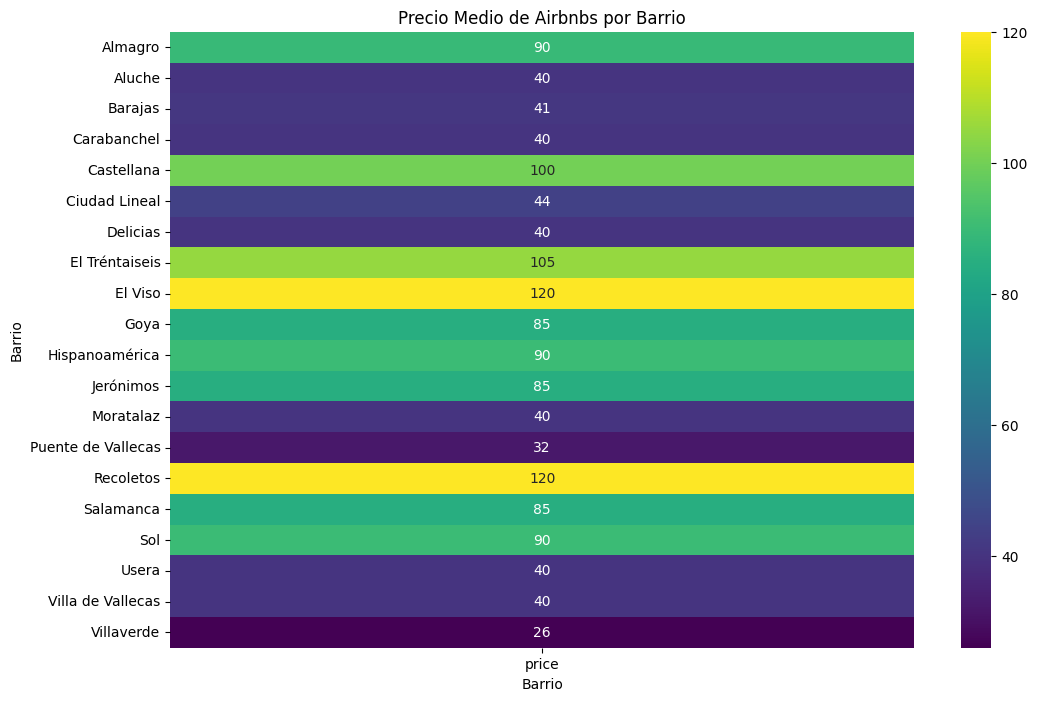

In [17]:
#Diez barrios con el precio más alto y diez con el más bajo
# Calcular el precio medio por barrio
price_by_neighbourhood = merged_df.groupby('neighbourhood')['price'].median().reset_index()

# Seleccionar los 10 barrios con los precios más altos y los 10 barrios con los precios más bajos
top_10_neighbourhoods = price_by_neighbourhood.nlargest(10, 'price')
bottom_10_neighbourhoods = price_by_neighbourhood.nsmallest(10, 'price')

# Combinar los barrios seleccionados
selected_neighbourhoods = pd.concat([top_10_neighbourhoods, bottom_10_neighbourhoods])

# Crear un mapa de calor con los barrios seleccionados
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(selected_neighbourhoods.pivot_table(index='neighbourhood', values='price'), cmap='viridis', annot=True, fmt=".0f")
heatmap.set_title('Precio Medio de Airbnbs por Barrio')
heatmap.set_xlabel('Barrio')
heatmap.set_ylabel('Barrio')
plt.yticks(rotation=0)  # Rotar etiquetas del eje y para mayor legibilidad
plt.show()

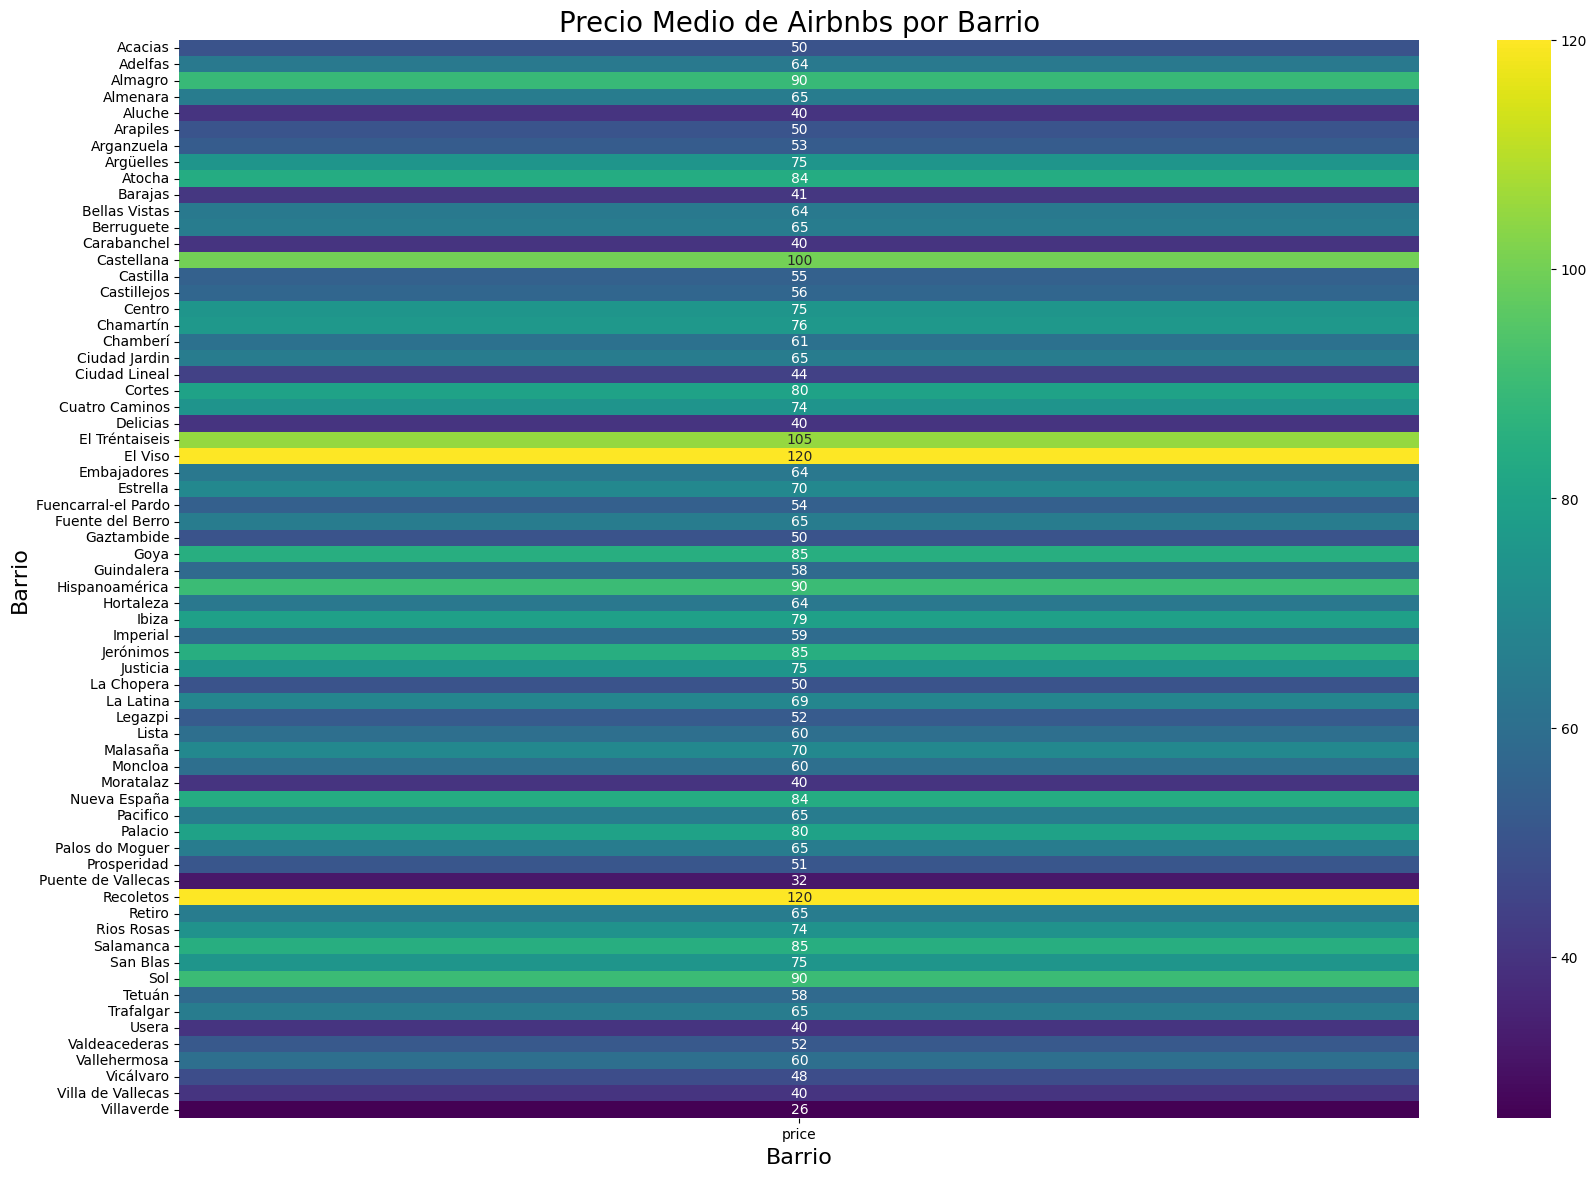

In [18]:

# Calcular el precio medio por barrio
price_by_neighbourhood = merged_df.groupby('neighbourhood')['price'].median().reset_index()

# Crear un mapa de calor
plt.figure(figsize=(20, 14))  # Ajustar el tamaño del gráfico
heatmap = sns.heatmap(price_by_neighbourhood.pivot_table(index='neighbourhood', values='price'), cmap='viridis', annot=True, fmt=".0f")
heatmap.set_title('Precio Medio de Airbnbs por Barrio', fontsize=20)  # Ajustar el tamaño de la fuente del título
heatmap.set_xlabel('Barrio', fontsize=16)  # Ajustar el tamaño de la fuente del eje x
heatmap.set_ylabel('Barrio', fontsize=16)  # Ajustar el tamaño de la fuente del eje y
plt.yticks(rotation=0, fontsize=10)  # Rotar etiquetas del eje y y ajustar tamaño de la fuente
plt.show()

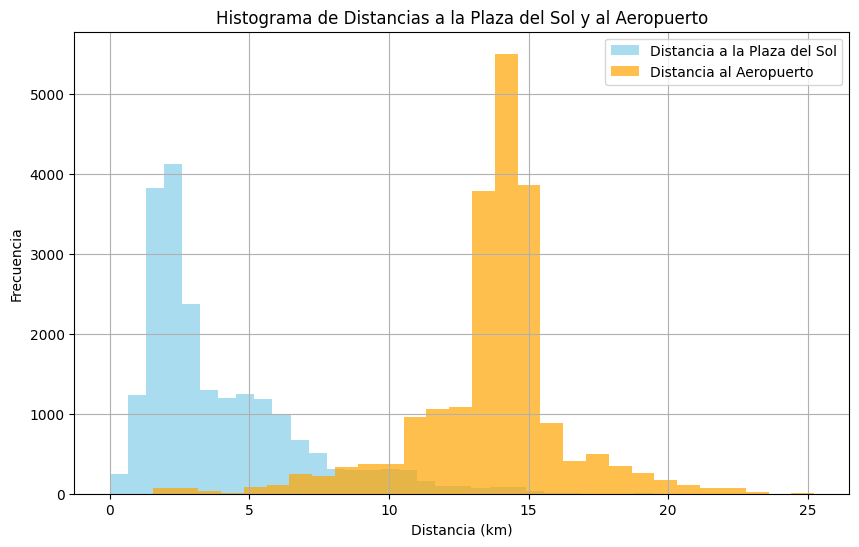

In [19]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(merged_df['dist_km_sol'], bins=30, color='skyblue', alpha=0.7, label='Distancia a la Plaza del Sol')
plt.hist(merged_df['dist_km_airport'], bins=30, color='orange', alpha=0.7, label='Distancia al Aeropuerto')
plt.title('Histograma de Distancias a la Plaza del Sol y al Aeropuerto')
plt.xlabel('Distancia (km)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

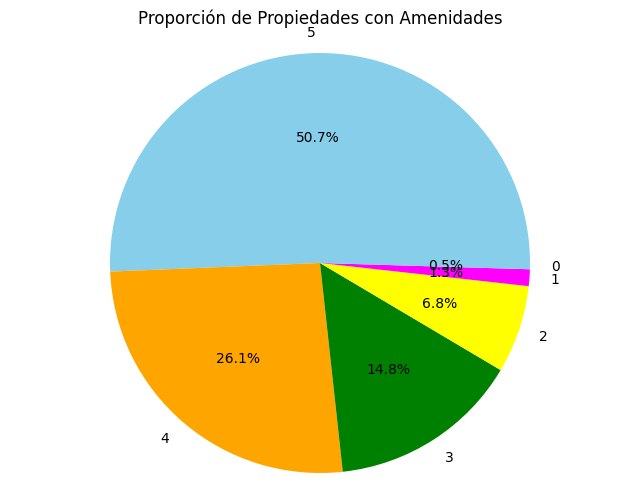

In [34]:
# Contar el número de propiedades que tienen cada combinación de amenidades
propiedades_con_amenidades = merged_df[['amenities_kitchen', 'amenities_wifi_internet', 'amenities_air_conditioning', 'amenities_tv', 'amenities_heating']].sum(axis=1)

# Contar el número de propiedades que tienen cada combinación de amenidades
conteo_amenidades = propiedades_con_amenidades.value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteo_amenidades, labels=conteo_amenidades.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'yellow', 'magenta'])
plt.title('Proporción de Propiedades con Amenidades')
plt.axis('equal')  # Para que el pastel tenga forma de círculo
plt.show()

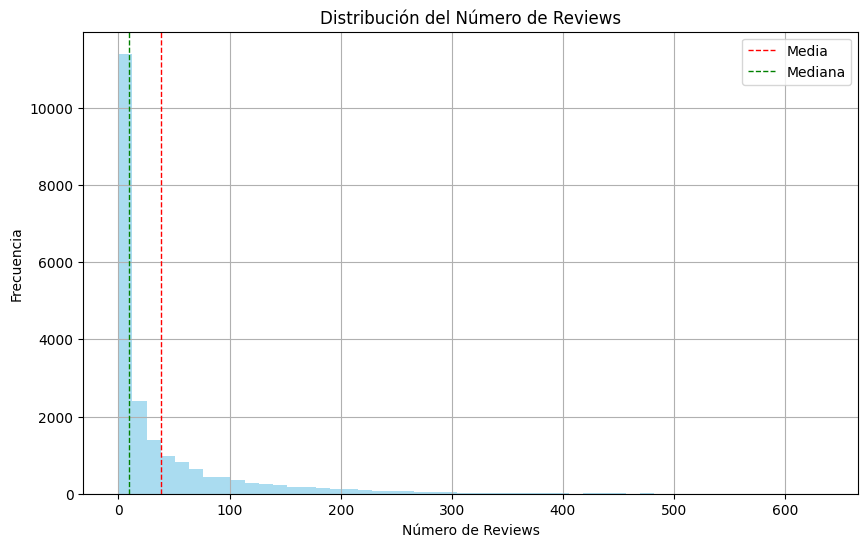

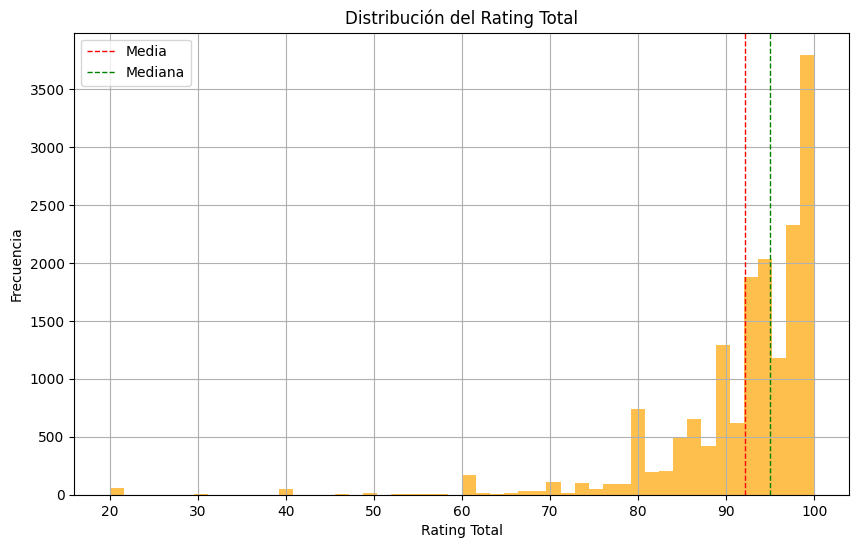

In [21]:

# Crear el histograma para el número de reviews
plt.figure(figsize=(10, 6))
plt.hist(merged_df['number_of_reviews'], bins=50, color='skyblue', alpha=0.7)
plt.axvline(merged_df['number_of_reviews'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(merged_df['number_of_reviews'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución del Número de Reviews')
plt.xlabel('Número de Reviews')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Crear el histograma para el rating total
plt.figure(figsize=(10, 6))
plt.hist(merged_df['review_scores_rating'].dropna(), bins=50, color='orange', alpha=0.7)
plt.axvline(merged_df['review_scores_rating'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(merged_df['review_scores_rating'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución del Rating Total')
plt.xlabel('Rating Total')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

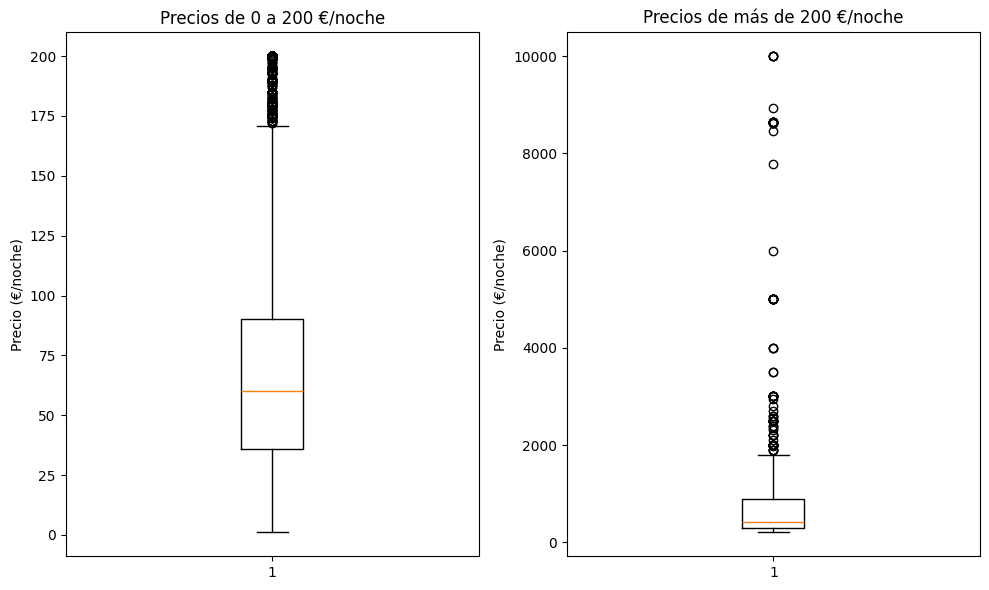

In [22]:
#Hacemos dos boxplots de price, uno de 0 a 200€ la noche, otro de 200€ o más

# Filtrar los datos para obtener dos conjuntos separados: precios menores o iguales a 200 y precios mayores a 200
precios_bajos = merged_df[merged_df['price'] <= 200]
precios_altos = merged_df[merged_df['price'] > 200]

# Crear los boxplots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  # Primer subplot para precios bajos
plt.boxplot(precios_bajos['price'])
plt.title('Precios de 0 a 200 €/noche')
plt.ylabel('Precio (€/noche)')

plt.subplot(1, 2, 2)  # Segundo subplot para precios altos
plt.boxplot(precios_altos['price'])
plt.title('Precios de más de 200 €/noche')
plt.ylabel('Precio (€/noche)')

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los títulos
plt.show()

C:\Users\jaume\AppData\Local\Temp\ipykernel_24260\1213084875.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['price'], shade=True, color='skyblue', linewidth=2, alpha=0.8)


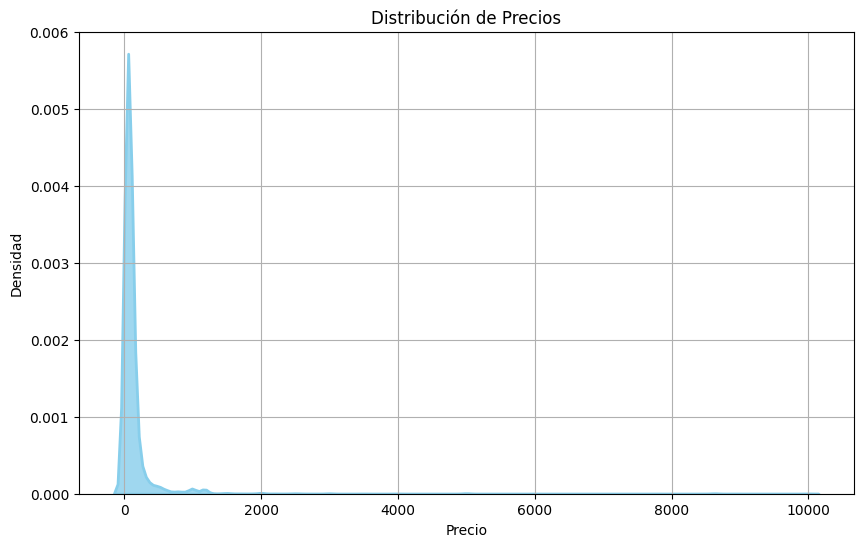

In [23]:

# Crear el gráfico de densidad para la variable 'price'
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_df['price'], shade=True, color='skyblue', linewidth=2, alpha=0.8)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# 2. Definir el problema que queremos resolver

Una vez mas un cliente nos pide dar respuesta a un problema mal definido. Antes
de lanzarte a picar código es necesario que definas correctamente el problema
que quieres responder. Convierte la pregunta inicial a una en la que el problema
cumpla con los **4 principios esenciales** que hemos visto. Hazte las siguientes
preguntas para entender si vas por buen camino:
- **concreto**: ¿hay alguna ambigüedad en la definición del problema? ¿queda
suficientemente claro para que no haya errores de interpretación ni mal
entendidos?
- **alcance**: ¿está claro cuándo se va a acabar el análisis?
- **valor**: ¿la solución al problema tiene valor para el cliente?
- **accionable**: ¿el cliente tiene capacidad de accionar la solución al
problema?

Cuando vayais ideando vuestra definición del problema podeis escribirme por
privado en Slack para daros el OK y pasar a la siguiente fase.

# Respuesta punto 2

Para optimizar el precio de las viviendas, es importante definir el problema de manera clara y concisa, asegurándose de que cumpla con los 4 principios esenciales:
1.	Concreto:
•	¿Cómo puedo ajustar el precio de mis viviendas para maximizar los ingresos y la rentabilidad?
•	¿Qué estrategias puedo implementar para mejorar la fijación de precios y aumentar la competitividad en el mercado inmobiliario?
•	¿Qué factores influyen en el precio de las viviendas y cómo puedo gestionarlos eficazmente para obtener el mejor rendimiento económico?
2.	Alcance:
•	El análisis finalizará cuando se identifiquen y apliquen estrategias efectivas para optimizar el precio de las viviendas y se evalúen sus resultados en términos de ingresos y rentabilidad.
3.	Valor:
•	La solución al problema proporcionará un mayor retorno de la inversión al cliente al mejorar la fijación de precios y la competitividad en el mercado inmobiliario.
•	Optimizar el precio de las viviendas permitirá al cliente maximizar sus ingresos y obtener una mejor rentabilidad de sus activos inmobiliarios.
4.	Accionable:
•	El cliente tiene capacidad para implementar las estrategias sugeridas y tomar decisiones basadas en los análisis realizados.
•	Las recomendaciones y acciones propuestas serán prácticas y aplicables en el contexto específico del cliente, permitiéndole tomar medidas concretas para mejorar la fijación de precios de sus viviendas.
•	No será accionable en cuanto a la ubicación, pero los datos en cuanto esta variable le podrán servir en un futuro si decide invertir en otra vivienda.


# 3. Definir y desarrollar el Roadmap del analisis

El dataset tiene muchas variables y tienes un tiempo muy limitado, no tienes que
analizar todo ni dar respuesta a todas las hipótesis que se te ocurran al
inicio, lo importante es que el enfoque para realizar el data storytelling sea
correcto, el resto es echarle mas horas.

Con el tiempo que tienes piensa una lista de hipótesis y las preguntas que
quieres responder con los datos. Estructura el roadmap y prioriza las
hipótesis que creas más prometedoras. Cuando tengas el roadmap claro analiza
los datos con estadísticas y visualizaciones.

# Respuesta punto 3

1.	Hipótesis de Precio Óptimo:

•	Hipótesis: Existe un precio óptimo para cada tipo de propiedad en función de factores como la ubicación y las políticas de cancelación.

•	Experimento: Analizar la relación entre el precio de alquiler y variables como la ubicación, las comodidades y las políticas de cancelación para identificar patrones que indiquen un precio óptimo.

2.	Hipótesis de Impacto de las Comodidades en el Precio:

•	Hipótesis: Las comodidades ofrecidas en una propiedad (por ejemplo, wifi, cocina equipada, aire acondicionado) tienen un impacto significativo en el precio de alquiler.

•	Experimento: Comparar los precios de alquiler de propiedades con diferentes conjuntos de comodidades para determinar qué características tienen un mayor impacto en el precio.

3.	Hipótesis de Impacto de la Ubicación en la Demanda:

•	Hipótesis: La proximidad al centro de la ciudad y a lugares turísticos importantes, como la plaza del Sol, influye en el precio.

•	Experimento: Analizar la relación entre la distancia al centro de la ciudad, la distancia a la plaza del Sol para determinar cómo afecta la ubicación a la demanda y los ingresos.

4.	Hipótesis de la relación Price con las demás variables:

•	Hipótesis: Las reviews positivas tienen un impacto positivo en la tasa de ocupación de una propiedad, ya que los huéspedes están más inclinados a reservar propiedades con buenas críticas.

•	Experimento: Evaluar la relación entre las calificaciones de las reviews y la tasa de ocupación de las propiedades para determinar el impacto de las reviews en la demanda.

5.	Hipótesis de Mejora de la Experiencia del Huésped:

•	Hipótesis: Mejorar la experiencia del huésped, mediante una comunicación clara, un check-in suave y una atención rápida a las necesidades del huésped, puede aumentar las calificaciones de las reviews y el precio.

•	Experimento: Implementar medidas para mejorar la experiencia del huésped y las calificaciones de las reviews antes y después de la implementación.

6.	Hipótesis de correlación entre superhost, verified y seniority entre review scores rating y Price.


1.	Hipótesis de Precio Óptimo:

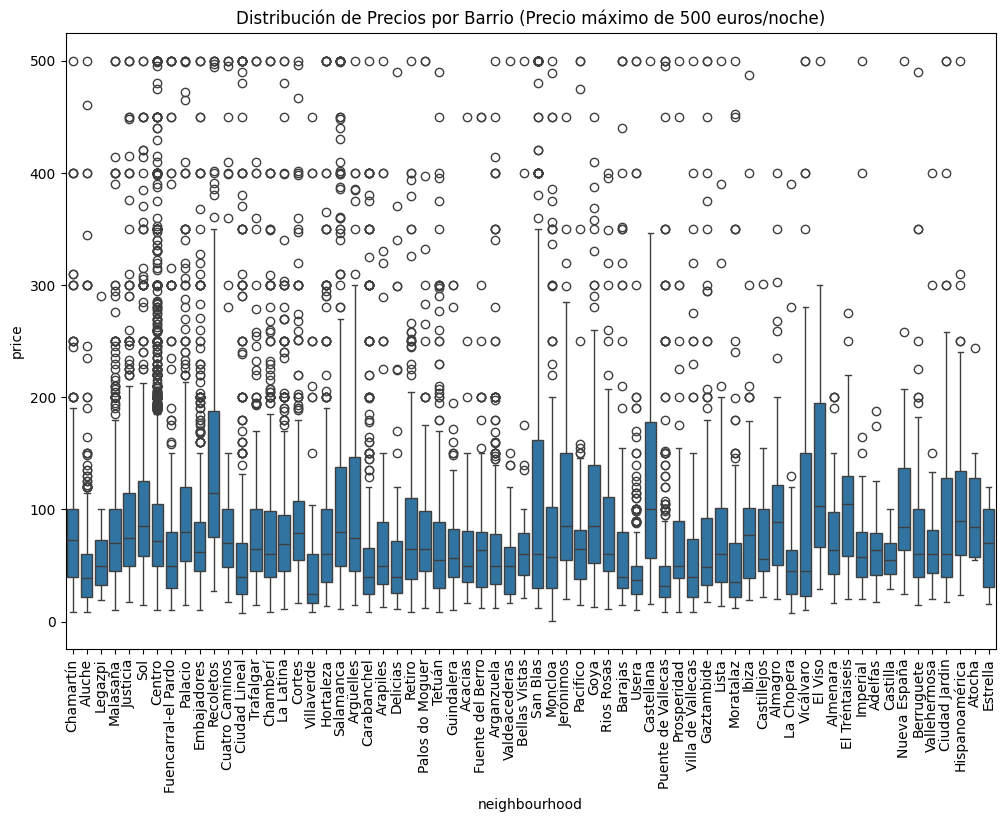

In [24]:
# Filtrar el DataFrame para incluir solo las propiedades con un precio de hasta 500 euros por noche
merged_df_filtered = merged_df[merged_df['price'] <= 500]

# Crear un boxplot para cada barrio
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='price', data=merged_df_filtered)
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Barrio (Precio máximo de 500 euros/noche)')
plt.show()

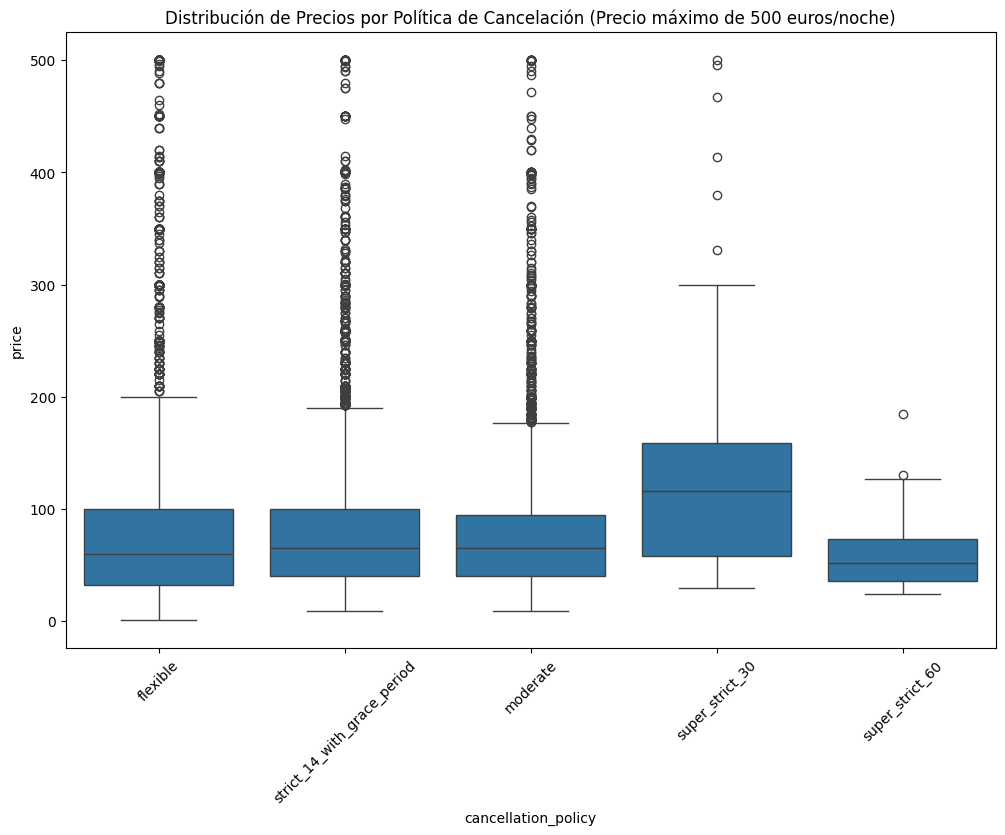

In [25]:
# Filtrar el DataFrame para incluir solo las propiedades con un precio de hasta 500 euros por noche
merged_df_filtered = merged_df[merged_df['price'] <= 500]

# Crear un boxplot para cada política de cancelación
plt.figure(figsize=(12, 8))
sns.boxplot(x='cancellation_policy', y='price', data=merged_df_filtered)
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Política de Cancelación (Precio máximo de 500 euros/noche)')
plt.show()

2.	Hipótesis de Impacto de las Comodidades en el Precio:

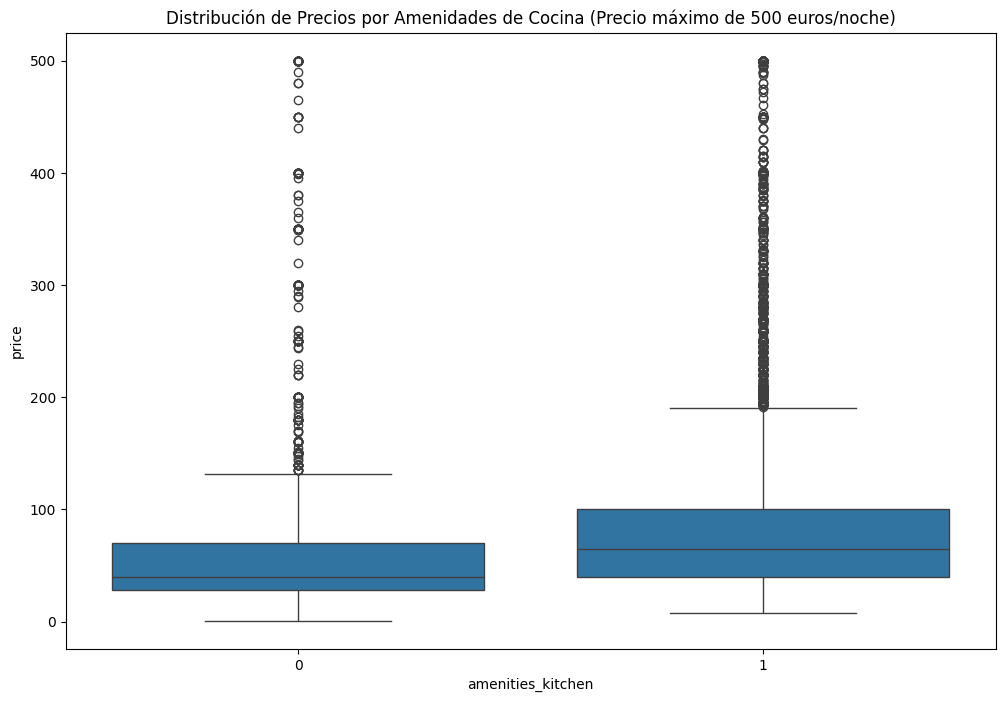

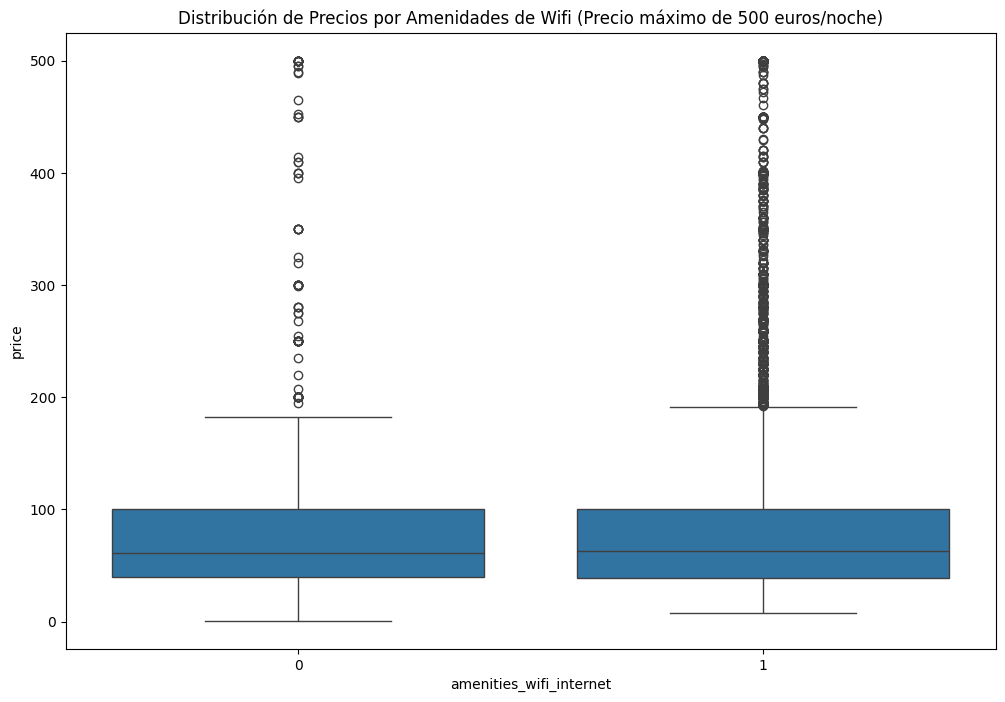

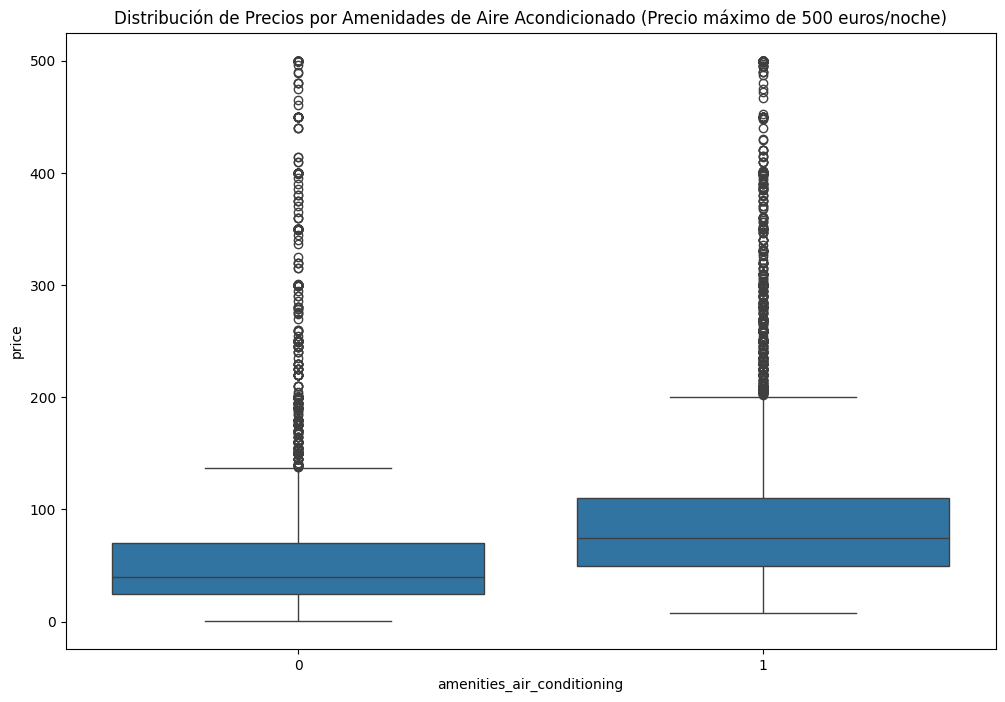

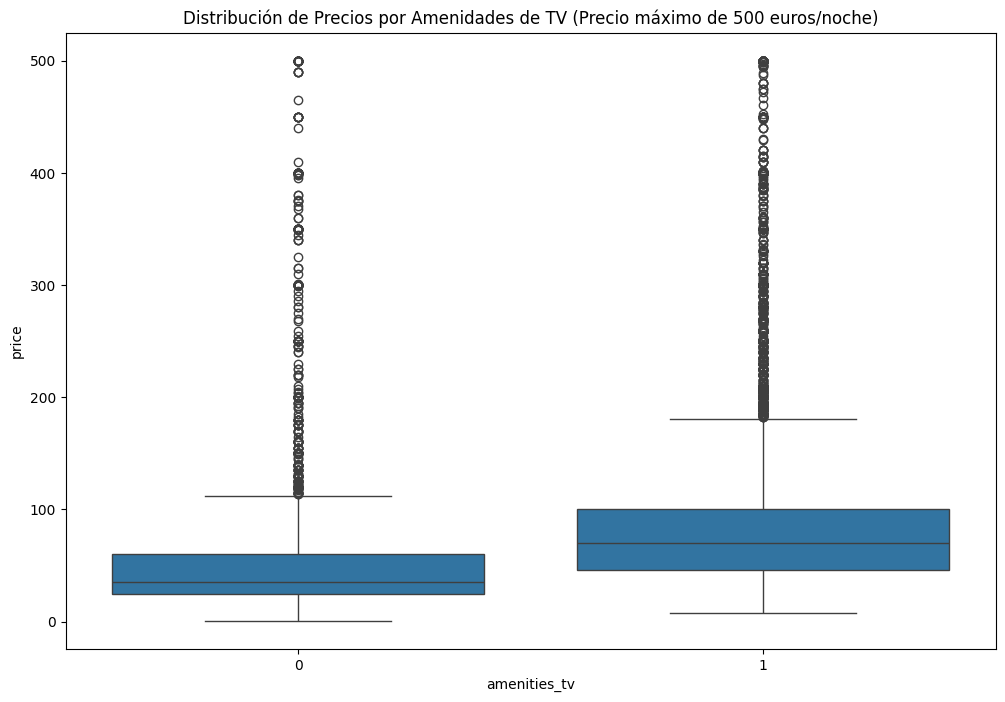

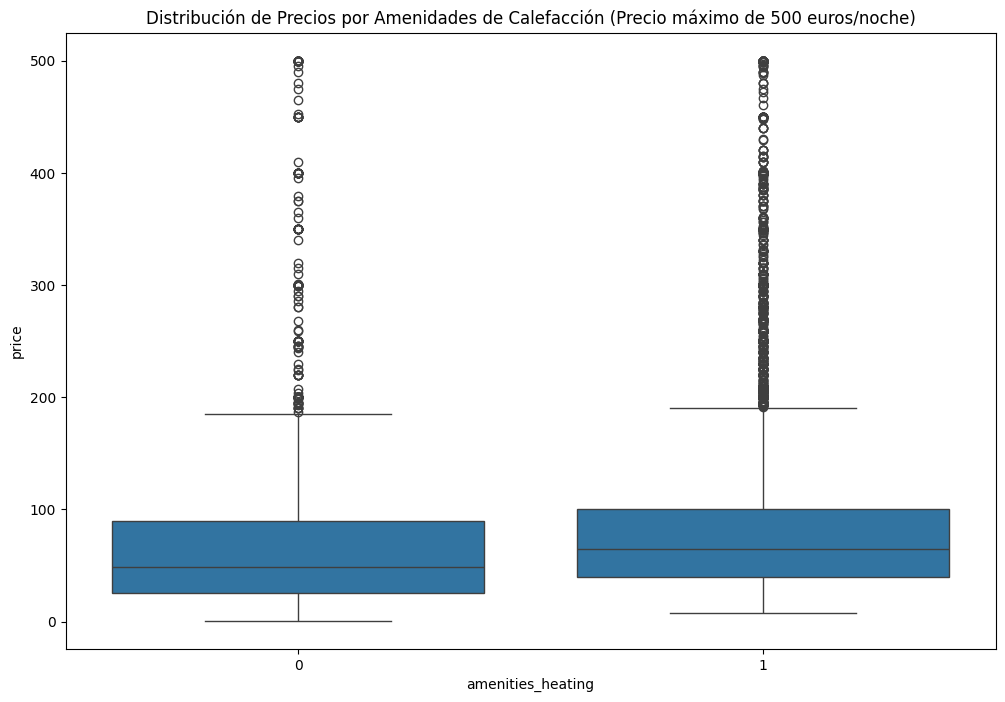

In [26]:
# Filtrar el DataFrame para incluir solo las propiedades con un precio de hasta 500 euros por noche
merged_df_filtered = merged_df[merged_df['price'] <= 500]

# Crear un boxplot para cada amenidad de cocina
plt.figure(figsize=(12, 8))
sns.boxplot(x='amenities_kitchen', y='price', data=merged_df_filtered)
plt.title('Distribución de Precios por Amenidades de Cocina (Precio máximo de 500 euros/noche)')
plt.show()

# Crear un boxplot para cada amenidad de wifi
plt.figure(figsize=(12, 8))
sns.boxplot(x='amenities_wifi_internet', y='price', data=merged_df_filtered)
plt.title('Distribución de Precios por Amenidades de Wifi (Precio máximo de 500 euros/noche)')
plt.show()

# Crear un boxplot para cada amenidad de aire acondicionado
plt.figure(figsize=(12, 8))
sns.boxplot(x='amenities_air_conditioning', y='price', data=merged_df_filtered)
plt.title('Distribución de Precios por Amenidades de Aire Acondicionado (Precio máximo de 500 euros/noche)')
plt.show()

# Crear un boxplot para cada amenidad de TV
plt.figure(figsize=(12, 8))
sns.boxplot(x='amenities_tv', y='price', data=merged_df_filtered)
plt.title('Distribución de Precios por Amenidades de TV (Precio máximo de 500 euros/noche)')
plt.show()

# Crear un boxplot para cada amenidad de calefacción
plt.figure(figsize=(12, 8))
sns.boxplot(x='amenities_heating', y='price', data=merged_df_filtered)
plt.title('Distribución de Precios por Amenidades de Calefacción (Precio máximo de 500 euros/noche)')
plt.show()


3.	Hipótesis de Impacto de la Ubicación en la Demanda:

Correlación entre Precio y Distancia al Aeropuerto: -0.06364775442021302


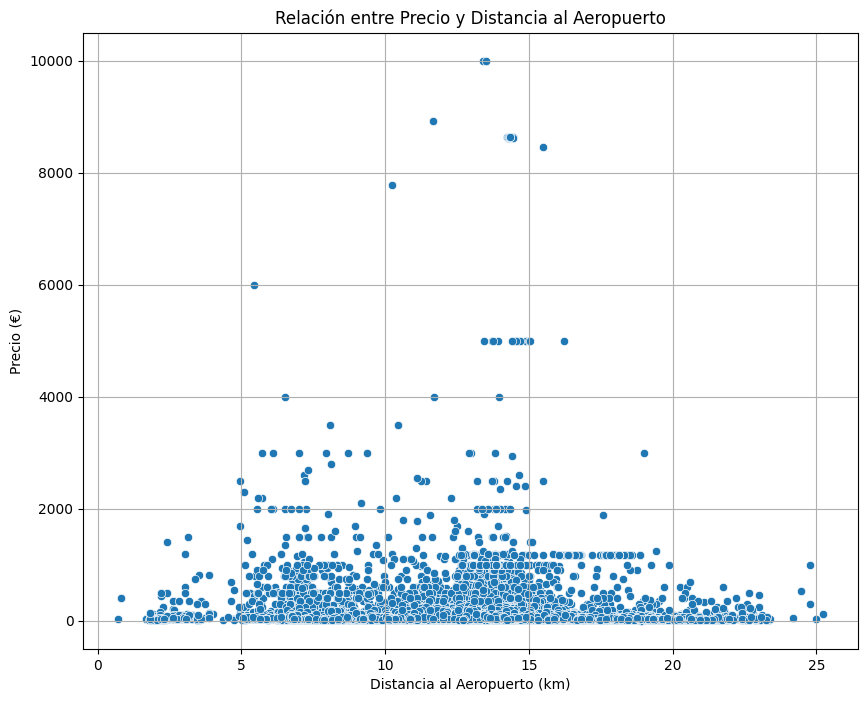

Correlación entre Precio y Distancia a la Plaza del Sol: 0.028361809659992493


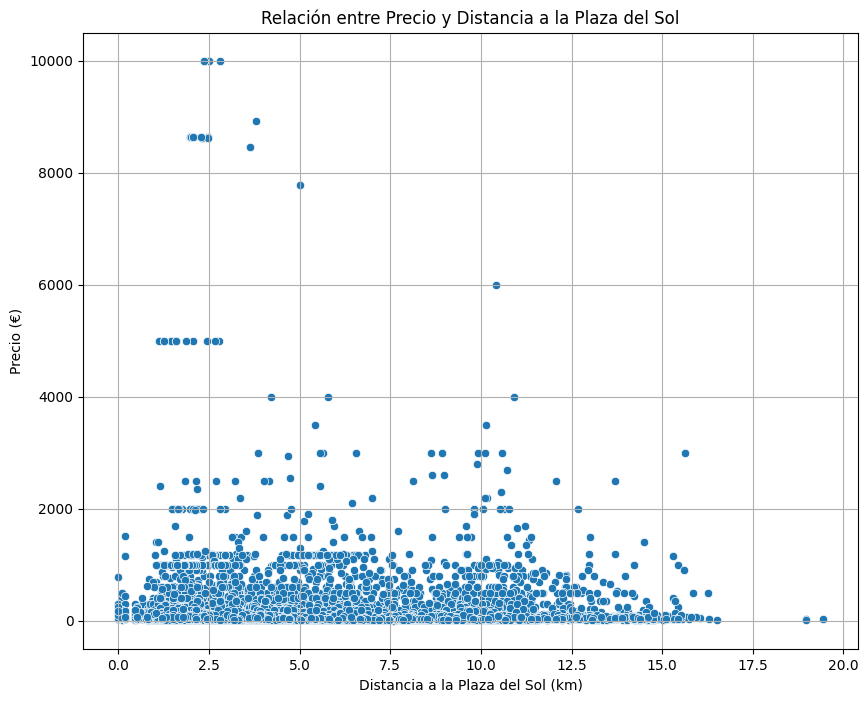

In [27]:
# Calcular la correlación entre el precio y la distancia al aeropuerto
corr_airport = merged_df['price'].corr(merged_df['dist_km_airport'])
print("Correlación entre Precio y Distancia al Aeropuerto:", corr_airport)

# Crear un gráfico de dispersión para visualizar la relación entre precio y distancia al aeropuerto
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dist_km_airport', y='price', data=merged_df)
plt.xlabel('Distancia al Aeropuerto (km)')
plt.ylabel('Precio (€)')
plt.title('Relación entre Precio y Distancia al Aeropuerto')
plt.grid(True)
plt.show()

# Calcular la correlación entre el precio y la distancia a la Plaza del Sol
corr_sol = merged_df['price'].corr(merged_df['dist_km_sol'])
print("Correlación entre Precio y Distancia a la Plaza del Sol:", corr_sol)

# Crear un gráfico de dispersión para visualizar la relación entre precio y distancia a la Plaza del Sol
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dist_km_sol', y='price', data=merged_df)
plt.xlabel('Distancia a la Plaza del Sol (km)')
plt.ylabel('Precio (€)')
plt.title('Relación entre Precio y Distancia a la Plaza del Sol')
plt.grid(True)
plt.show()


4.	Hipótesis de Relación Price con las demás variables:

In [28]:
# Codificar variables categóricas
merged_df_encoded = pd.get_dummies(merged_df)

# Calcular las correlaciones con el precio
correlation_with_price = merged_df_encoded.corr()['price'].sort_values(ascending=False)

# Mostrar las 5 variables más correlacionadas con el precio
top_correlated_variables = correlation_with_price.drop('price').head(9)
print("Las 5 variables más correlacionadas con el precio son:")
print(top_correlated_variables)

Las 5 variables más correlacionadas con el precio son:
accommodates                                 0.106034
property_type_boutique_hotel                 0.102918
neighbourhood_San Blas                       0.099793
neighbourhood_group_San Blas - Canillejas    0.099494
beds                                         0.095346
property_type_hotel                          0.092751
bedrooms                                     0.091989
id                                           0.078820
room_type_entire_home_apt                    0.061490
Name: price, dtype: float64


price_category_purple: Esta variable parece estar fuertemente correlacionada con el precio. Podría representar diferentes categorías de precios y podría ser una característica importante para predecir el precio de una propiedad.

accommodates, beds y bedrooms: Estas variables están moderadamente correlacionadas con el precio. Es comprensible, ya que el tamaño de la propiedad, el número de camas y dormitorios suelen influir en el precio del alquiler.

price_category_salmon: Similar a price_category_purple, esta variable también parece representar diferentes categorías de precios y está correlacionada positivamente con el precio.

property_type_boutique_hotel y property_type_hotel: Estas variables indican el tipo de propiedad y parecen estar relacionadas con el precio, especialmente los hoteles y los boutique hoteles que pueden tener precios más altos.

neighbourhood_San Blas y neighbourhood_group_San Blas - Canillejas: Estas variables representan el vecindario donde se encuentra la propiedad. Parece que el vecindario de San Blas y San Blas - Canillejas están correlacionados positivamente con el precio, lo que sugiere que las propiedades en estos vecindarios tienden a tener precios más altos.

5.	Hipótesis de Mejora de la Experiencia del Huésped:

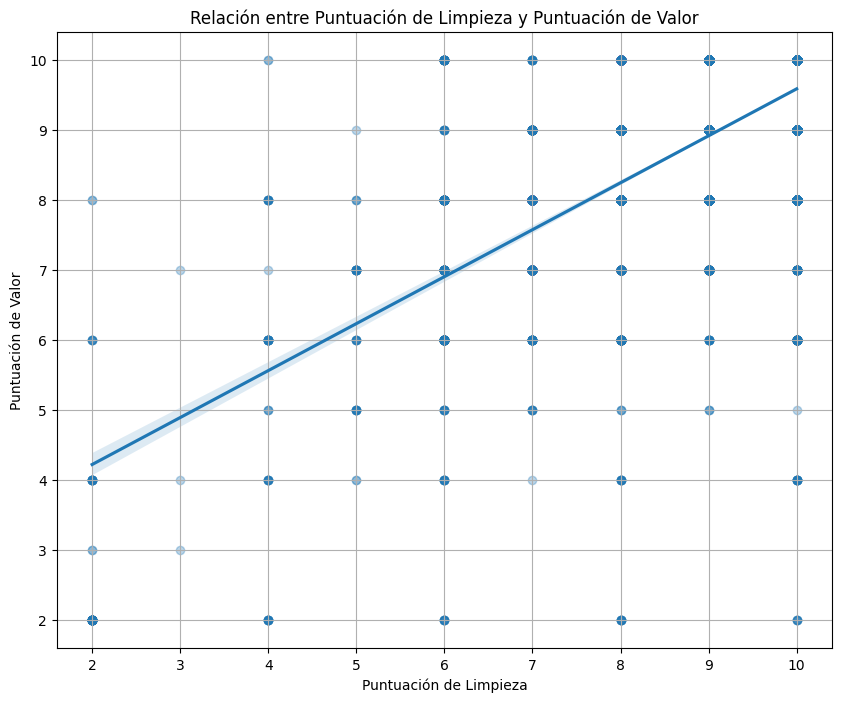

In [29]:
# Crear un gráfico de regresión lineal para visualizar la relación entre review_scores_cleanliness y review_scores_value
plt.figure(figsize=(10, 8))
sns.regplot(x='review_scores_cleanliness', y='review_scores_value', data=merged_df, scatter_kws={'alpha':0.3})
plt.xlabel('Puntuación de Limpieza')
plt.ylabel('Puntuación de Valor')
plt.title('Relación entre Puntuación de Limpieza y Puntuación de Valor')
plt.grid(True)
plt.show()

In [30]:
correlation = merged_df['review_scores_cleanliness'].corr(merged_df['review_scores_value'])
print("Correlación entre review_scores_cleanliness y review_scores_value:", correlation)


Correlación entre review_scores_cleanliness y review_scores_value: 0.6562996301197211


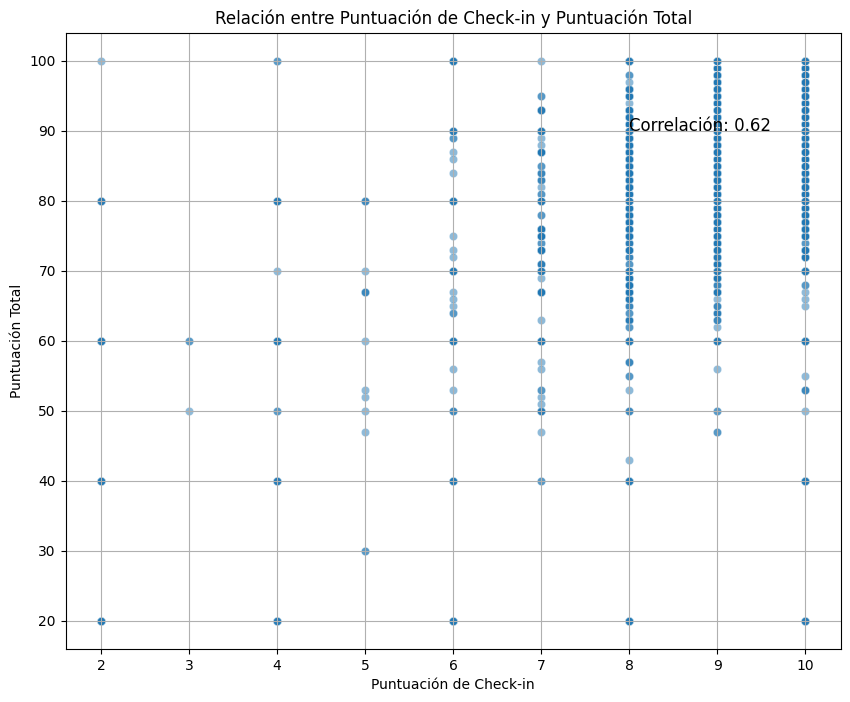

In [31]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(x='review_scores_checkin', y='review_scores_rating', data=merged_df, alpha=0.5)
plt.xlabel('Puntuación de Check-in')
plt.ylabel('Puntuación Total')
plt.title('Relación entre Puntuación de Check-in y Puntuación Total')
plt.grid(True)

# Calcular la correlación
correlation_checkin_total = merged_df['review_scores_checkin'].corr(merged_df['review_scores_rating'])
plt.text(8, 90, f'Correlación: {correlation_checkin_total:.2f}', fontsize=12)

plt.show()

6.	Hipótesis de correlación entre superhost, verified y seniority entre review scores rating y Price.

In [32]:
#Buscando correlaciones
correlation_matrix = merged_df[['host_seniority', 'host_identity_verified', 'host_is_superhost', 'review_scores_rating', 'price']].corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

                        host_seniority  host_identity_verified  \
host_seniority                1.000000                0.440128   
host_identity_verified        0.440128                1.000000   
host_is_superhost             0.085717                0.100884   
review_scores_rating          0.087358                0.089485   
price                        -0.073458               -0.058975   

                        host_is_superhost  review_scores_rating     price  
host_seniority                   0.085717              0.087358 -0.073458  
host_identity_verified           0.100884              0.089485 -0.058975  
host_is_superhost                1.000000              0.293105 -0.050801  
review_scores_rating             0.293105              1.000000 -0.013996  
price                           -0.050801             -0.013996  1.000000  


•	host_seniority y host_identity_verified: La correlación entre la antigüedad del anfitrión y si el anfitrión está verificado es moderada (0.440). Esto sugiere que hay una relación positiva, pero no muy fuerte, entre la antigüedad del anfitrión y su verificación de identidad.

•	host_identity_verified y host_is_superhost: La correlación entre si el anfitrión está verificado y si es superhost es baja (0.100). Esto indica que hay una relación débil entre estas dos variables.

•	host_is_superhost y review_scores_rating: La correlación entre si el anfitrión es superhost y la calificación de las reviews es moderada (0.293). Esto sugiere que hay una relación positiva, pero no muy fuerte, entre ser superhost y recibir calificaciones más altas.

•	review_scores_rating y price: La correlación entre la calificación de las reviews y el precio es muy baja (-0.014). Esto indica que no hay una relación significativa entre la calificación de las reviews y el precio de la propiedad.

•	host_seniority y price: La correlación entre la antigüedad del anfitrión y el precio es baja (-0.073). Esto sugiere que hay una relación débil, pero negativa, entre la antigüedad del anfitrión y el precio de la propiedad.


In [33]:
# Buscando correlaciones
correlation_matrix = merged_df[['host_is_superhost', 'host_identity_verified', 'host_seniority', 'price']].corr()

# Imprimir los resultados
print(correlation_matrix)

                        host_is_superhost  host_identity_verified  \
host_is_superhost                1.000000                0.100884   
host_identity_verified           0.100884                1.000000   
host_seniority                   0.085717                0.440128   
price                           -0.050801               -0.058975   

                        host_seniority     price  
host_is_superhost             0.085717 -0.050801  
host_identity_verified        0.440128 -0.058975  
host_seniority                1.000000 -0.073458  
price                        -0.073458  1.000000  


•	host_is_superhost y price: La correlación entre si el anfitrión es superhost y el precio es muy baja (-0.051), lo que sugiere que no hay una relación significativa entre estas dos variables. Esto indica que ser superhost o no no parece tener un impacto importante en el precio de la propiedad.

•	host_identity_verified y price: La correlación entre si el anfitrión está verificado y el precio también es muy baja (-0.059), lo que sugiere que no hay una relación significativa entre estas dos variables. Esto indica que la verificación de la identidad del anfitrión tampoco parece tener un impacto importante en el precio de la propiedad.

•	host_seniority y price: La correlación entre la antigüedad del anfitrión y el precio es baja (-0.073), pero es ligeramente más fuerte que las correlaciones anteriores. Esto sugiere que puede haber una relación débil, pero negativa, entre la antigüedad del anfitrión y el precio de la propiedad. Es decir, propiedades con anfitriones más antiguos podrían tener precios ligeramente más bajos.


# 4. Recopilar los principales insights para montar el storytelling final

En este apartado, presentaremos algunos de los datos más significativos que podemos extraer de nuestra investigación. Al final, ofreceremos los mejores análisis para ayudar al cliente a optimizar los precios de las propiedades en AirBnB en Madrid.

Contamos con un total de 51 variables y aproximadamente 21,020 valores por cada una.
El barrio más densamente poblado es el Centro, con más de 4,000 propiedades con tarifas nocturnas de hasta 200€. En segundo lugar, se encuentra Embajadores, con poco más de 1,000 propiedades.

Para tarifas superiores a 200€ por noche, observamos que el Centro sigue siendo el líder con cerca de 400 propiedades, seguido por San Blas con poco más de 200 y Salamanca con poco más de 100.

Notamos que los barrios con una escasa presencia de propiedades AirBnB "de lujo" incluyen Acacias, Almenara, Atocha, Legazpi y Vallehermosa.

El 80% de los anfitriones de la aplicación no tienen la distinción de SuperHost, en comparación con el otro 20% que sí lo son. El mayor número de anfitriones se encuentra en tres rangos de antigüedad, cada uno con aproximadamente 1,400 usuarios: 200, 1,100 y 1,800 días de antigüedad. Además, hay algunos con más de 4,000 días de antigüedad, pero a medida que superamos los 1,600 días, el número de propietarios disminuye significativamente.

Los apartamentos son el tipo de propiedad más común, con una amplia gama de precios. Le siguen las casas, los lofts y los condominios, que también pueden tener precios elevados. Los menos comunes son las villas, apartahoteles, bungalows, casas domo, estancias en granjas, iglús, tiendas de campaña, etc., ya que tienden a ubicarse en contextos y lugares diferentes al que nos encontramos en el estudio.

Los barrios con los precios medios de AirBnB más altos son: Recoletos, El Viso, El Tréntaiseis, Castellana y Almagro. Los más bajos son: Villaverde, Puente de Vallecas, Carabanchel, Delicias y Aluche.

Aproximadamente 8,000 propiedades tienen una distancia de 2-4 km de la Plaza del Sol y alrededor de 15 km al aeropuerto.

El 50.7% de las propiedades ofrecen todas las comodidades mencionadas, mientras que el 26.1% ofrece al menos 4 de ellas, el 14.8% ofrece al menos 3, el 6.8% ofrece 2 y el 1.3% ofrece solo 1. Existe un 0.5% que no tiene ninguna de las comodidades mencionadas.
Hay muy pocos propietarios con muchas reseñas. La mayoría tiene entre 0 y 20, aunque algunos tienen hasta 200, 300 e incluso 634, que es el máximo. Alrededor de 3,500 anfitriones tienen una valoración del 100%. La mediana se sitúa en un 95% de puntuación, aunque hay algunos valores atípicos con puntuaciones mínimas.

Los precios por noche suelen oscilar entre 30€ y 80€, pero hay valores muy altos, como 9999€, que es el máximo.

Si observamos la relación entre los precios y la política de cancelación, notamos que la política "super_strict_30" tiene más propiedades con tarifas altas por noche. En cambio, cuando los precios son más bajos, la política de cancelación tiende a ser más flexible.

Las propiedades con cocina, aire acondicionado, televisión y calefacción suelen ser más caras que aquellas que no tienen estas comodidades. Sin embargo, resulta curioso que el WIFI no tenga un impacto significativo en el precio.

Las propiedades con precios más altos suelen estar a una distancia de 10-15 km del aeropuerto y de 2 a 5 km de la Plaza del Sol.

Existe una correlación muy fuerte entre la limpieza y la valoración final de la estancia, así como entre un check-in agradable y sencillo y una buena valoración.



# INSIGHTS

Para optimizar los precios de las propiedades en AirBnB en Madrid, podemos extraer varios insights valiosos de los datos proporcionados:

1.	Ubicación y Precios:

•	Los barrios más densamente poblados, como el Centro, presentan una amplia gama de precios, con más de 4,000 propiedades con tarifas nocturnas de hasta 200€. Esto sugiere que la competencia es alta en estas áreas, lo que puede influir en los precios.

•	Para tarifas superiores a 200€ por noche, el Centro sigue siendo líder, lo que indica una demanda continua de propiedades de alta gama en esta ubicación.

•	Los barrios con precios medios más altos, como Recoletos, El Viso y Castellana, pueden justificar precios más elevados debido a su prestigio y demanda.

•	Por otro lado, los barrios con precios más bajos, como Villaverde y Puente de Vallecas, pueden requerir precios más bajos para atraer a los huéspedes, pero aún así ofrecen oportunidades para un retorno de inversión.


2.	Tipo de Propiedad:

•	Los apartamentos son el tipo de propiedad más común y versátil, con una amplia gama de precios. Esto sugiere que adaptar el precio según la ubicación y las comodidades específicas puede ser beneficioso.

•	Propiedades menos comunes, como villas y bungalows, pueden ofrecer experiencias únicas que justifiquen precios más altos si se comercializan correctamente.


3.	Comodidades:

•	Las propiedades con comodidades como cocina, aire acondicionado, televisión y calefacción tienden a tener precios más altos. Por lo tanto, es importante considerar el valor agregado de estas comodidades al fijar los precios.

•	Aunque el WIFI no parece afectar significativamente los precios, sigue siendo una comodidad esperada por la mayoría de los huéspedes y puede influir en su decisión de reserva.


4.	Ubicación y Accesibilidad:

•	Las propiedades con precios más altos tienden a estar más cerca del aeropuerto y de la Plaza del Sol. Esto sugiere que la proximidad a puntos de interés puede influir en los precios.

•	Aquellas propiedades ubicadas en áreas con buenas conexiones de transporte público pueden justificar precios más altos debido a su accesibilidad.


5.	Experiencia del Huésped:

•	La limpieza y un check-in agradable y sencillo están fuertemente correlacionados con una buena valoración. Por lo tanto, invertir en servicios de limpieza y proporcionar una experiencia sin problemas puede aumentar la satisfacción del huésped y justificar precios más altos.

Al considerar estos insights, el cliente puede ajustar estratégicamente los precios de sus propiedades para maximizar los ingresos y la satisfacción del huésped en el mercado de AirBnB en Madrid.
